# 第10章 より実践的な前処理

matplotlibのおまじないと必要なライブラリのインポート

In [ ]:
# matplolibを表示できるようにする
%matplotlib inline

# pandasのインポート
import pandas as pd

## 10.1 さまざまなデータの読み込み

**問1**  
「weather2.data」を読み込み読み込み、先頭5行を表示してください  
区切り文字はタブ、文字コードはShift-JISになっています


In [ ]:
# csv読み込み
df = pd.read_csv('weather2.data', sep = '\t', encoding = 'Shift-jis')

# 先頭5行を表示
df.head()

,weather_id,weather
0,1,晴れ
1,2,曇り
2,3,雨


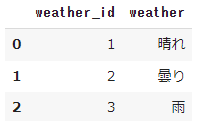

**問2**  
「weather3.data」を読み込み読み込み、先頭5行を表示してください  
区切り文字はタブ、文字コードはUTF-16になっています


In [ ]:
# csv読み込み
df2 = pd.read_csv('weather3.data', sep = '\t', encoding = 'UTF-16')

# 先頭5行を表示
df2.head()

,weather_id,weather
0,1,晴れ
1,2,曇り
2,3,雨


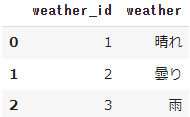

**問3**  
「weather.json」を読み込み読み込み、転置した結果の先頭5行を表示してください  
json形式、文字コードはShift-JISになっています

In [ ]:
# ファイル読み込み
df3 = pd.read_json('weather.json', encoding = 'shiftjis')

# 転置し、先頭5行を表示
df3.T.head()

,weather_id,weather
0,1,晴れ
1,2,曇り
2,3,雨


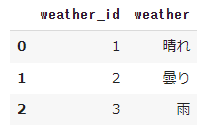

**問4**  
顧客.csvのデータを読み込み、先頭5行を表示してください

In [ ]:
df_kokyaku = pd.read_csv('顧客.csv')
df_kokyaku.head()

,顧客ID,氏名
0,1,鈴木
1,2,斉藤
2,3,山田
3,4,佐藤
4,5,山下


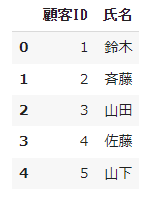

**問5**  
販売.csvのデータを読み込み、先頭5行を表示してください

In [ ]:
df_hanbai = pd.read_csv('販売.csv')
df_hanbai.head()

,顧客ID,商品ID,個数
0,1,1,3
1,2,1,4
2,3,3,1
3,4,3,2
4,1,4,3


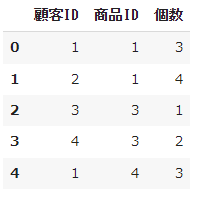

**問6**  
商品.csvのデータを読み込み、先頭5行を表示してください

In [ ]:
df_shouhin = pd.read_csv('商品.csv')
df_shouhin.head()

,商品ID,商品名
0,1,テレビ
1,2,エアコン
2,3,冷蔵庫
3,4,掃除機


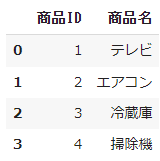

**問7**  
顧客.csvのデータに販売.csvのデータを内部結合し、df1に代入してください。  
キーは顧客ID列とします。  
また、df1の全ての行を表示してください

In [ ]:
# 内部結合し、df1に代入する
df1 = df_kokyaku.merge(df_hanbai, how = 'inner', on = '顧客ID')

# df1の内容をすべて表示する
df1

,顧客ID,氏名,商品ID,個数
0,1,鈴木,1,3
1,1,鈴木,4,3
2,2,斉藤,1,4
3,2,斉藤,4,4
4,3,山田,3,1
5,3,山田,4,1
6,4,佐藤,3,2


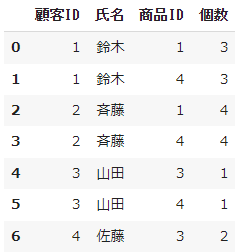

**問8**  
df1データに商品.csvのデータを内部結合し、df2に代入してください。  
キーは商品ID列とします。  
また、df2の全ての行を表示してください

In [ ]:
# 内部結合し、df2に代入する
df2 = df1.merge(df_shouhin, how = 'inner', on = '商品ID')

# df2の内容をすべて表示する
df2

,顧客ID,氏名,商品ID,個数,商品名
0,1,鈴木,1,3,テレビ
1,2,斉藤,1,4,テレビ
2,1,鈴木,4,3,掃除機
3,2,斉藤,4,4,掃除機
4,3,山田,4,1,掃除機
5,3,山田,3,1,冷蔵庫
6,4,佐藤,3,2,冷蔵庫


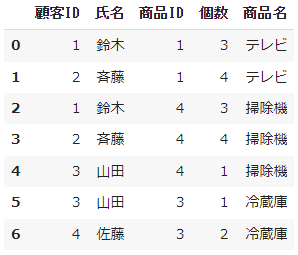

**問9**  
顧客.csvのデータに販売.csvのデータを左外部結合し、df3に代入してください。  
キーは顧客ID列とします。  
また、df3の全ての行を表示してください

In [ ]:
# 左外部結合し、df3に代入する
df3 = df_kokyaku.merge(df_hanbai, how = 'left', on = '顧客ID')

# df3の内容をすべて表示する
df3

,顧客ID,氏名,商品ID,個数
0,1,鈴木,1.0,3.0
1,1,鈴木,4.0,3.0
2,2,斉藤,1.0,4.0
3,2,斉藤,4.0,4.0
4,3,山田,3.0,1.0
5,3,山田,4.0,1.0
6,4,佐藤,3.0,2.0
7,5,山下,NaN,NaN


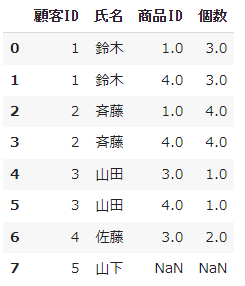

**問10**  
df3のデータに商品.csvのデータを左外部結合し、df4に代入してください。  
キーは商品ID列とします。   
また、df4の全ての行を表示してください

In [ ]:
# 左外部結合し、df4に代入する
df4 = df3.merge(df_shouhin, how = 'left', on = '商品ID')

# df4の内容をすべて表示する
df4

,顧客ID,氏名,商品ID,個数,商品名
0,1,鈴木,1.0,3.0,テレビ
1,1,鈴木,4.0,3.0,掃除機
2,2,斉藤,1.0,4.0,テレビ
3,2,斉藤,4.0,4.0,掃除機
4,3,山田,3.0,1.0,冷蔵庫
5,3,山田,4.0,1.0,掃除機
6,4,佐藤,3.0,2.0,冷蔵庫
7,5,山下,NaN,NaN,NaN


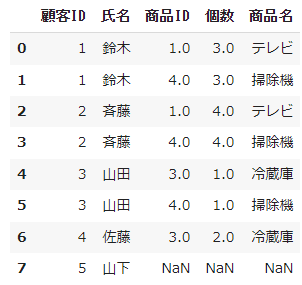

## 10.2 より高度な欠損値の処理

**問11**  
temp2.csvを読み込み、temp2に代入してください。  
また、temp2の先頭5行を表示してください

In [ ]:
# temp2.csvのデータを読み込み、temp2へ格納する
temp2 = pd.read_csv('temp2.csv')

# temp2の先頭5行を表示する
temp2.head()

,atemp,dteday,hum,temp,windspeed
0,0.363625,2011/1/1,0.805833,0.344167,0.160446
1,0.353739,2011/1/2,0.696087,0.363478,0.248539
2,0.189405,2011/1/3,0.437273,0.196364,0.248309
3,0.212122,2011/1/4,0.590435,0.200000,0.160296
4,0.229270,2011/1/5,0.436957,0.226957,0.186900


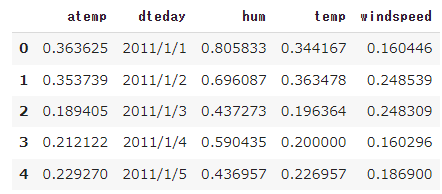

**問12**  
temp2のtemp列の折れ線グラフを表示してください

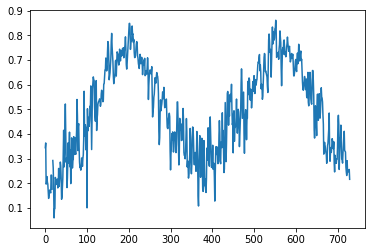

In [ ]:
# temp2['temp'].plot() でも可
temp2['temp'].plot(kind = 'line')

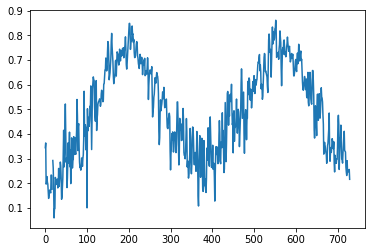

**問13**  
temp2のtemp列とhum列とwindspeed列の折れ線グラフを、1つの図の中に表示してください

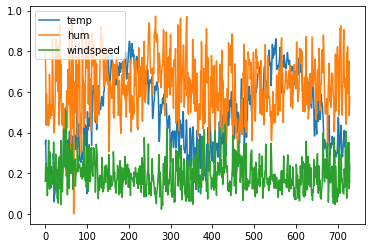

In [ ]:
# temp2[['temp','hum','windspeed']].plot() でも可
temp2[['temp', 'hum', 'windspeed']].plot(kind = 'line')

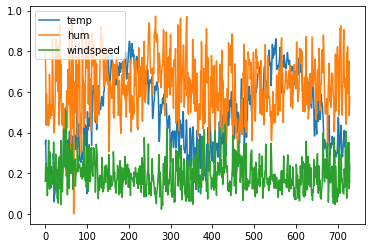

**問13**  
temp2のtemp列とhum列とwindspeed列のヒストグラムを、1つの図の中に表示してください  
temp列はアルファ値を指定しないでください  
hum列、windspeed列はアルファ値を0.3にしてください

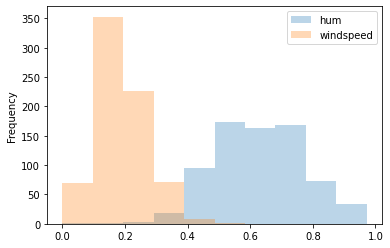

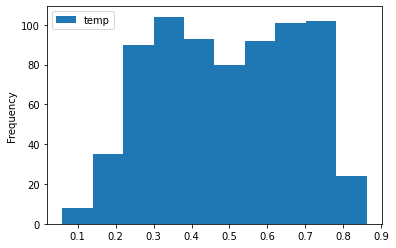

In [ ]:
temp2['temp'].plot(kind='hist')
temp2['hum'].plot(kind='hist', alpha=0.3)
temp2['windspeed'].plot(kind='hist', alpha=0.3)

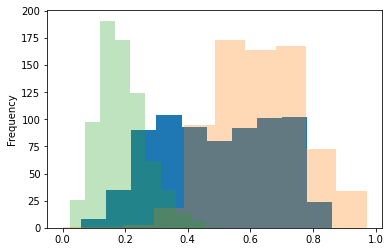

**問14**  
temp2のatemp列の190行から210行までを折れ線グラフに表示してください

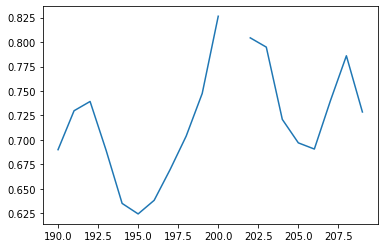

In [ ]:
temp2['atemp'].iloc[190:210].plot(kind = 'line')

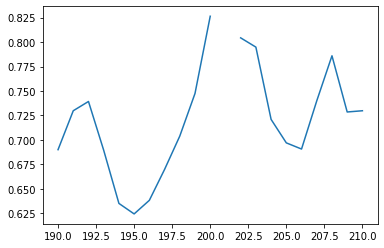

**問15**  
temp2のatemp列を線形補間してください。  
また、線形補間後の190行から210行までを折れ線グラフに表示してください。

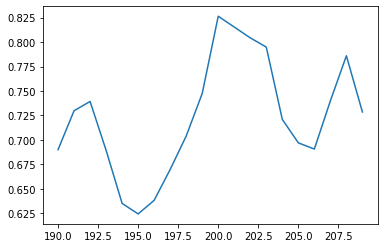

In [ ]:
# temp2のatemp列の欠損値を線形補間し、temp2のatemp列に代入し直す
temp2['atemp'] = temp2['atemp'].interpolate()

# temp2のatemp列の190行から210行までを折れ線グラフに表示し、補間されたことを確認する
# temp2.loc[190:210, 'atemp'].plot() でも可
temp2['atemp'].iloc[190:210].plot(kind = 'line')

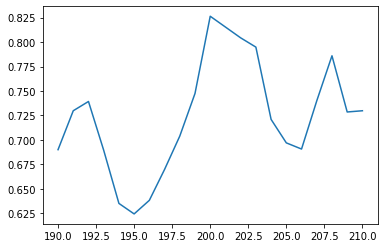

**問16**  
temp2のtemp列で欠損値のある行を表示してください

In [ ]:
temp2[temp2['temp'].isnull()]

,atemp,dteday,hum,temp,windspeed
17,0.232333,2011/1/18,0.861667,NaN,0.146775


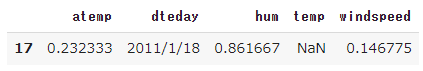

**問17**  
temp2のtemp列で欠損値の周辺の行を折れ線グラフに表示してください（欠損値のある行の前後15行ずつくらいでよい）

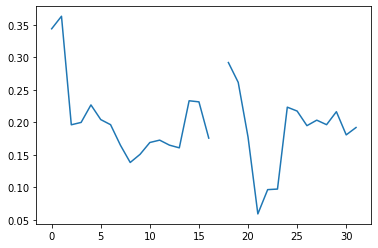

In [ ]:
# temp2['temp'].loc[:30].plot(kind='line') でも可
temp2['temp'].iloc[0:32].plot(kind = 'line')

各自が選んだ範囲でグラフは変わります  
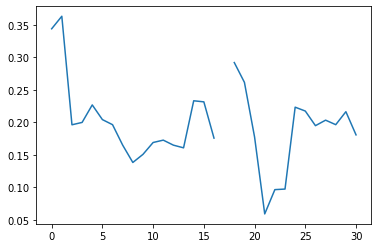

**問18**  
temp2のtemp列を線形補間してください。  
また、線形補間後に問17で表示した箇所の折れ線グラフを再度表示してください。

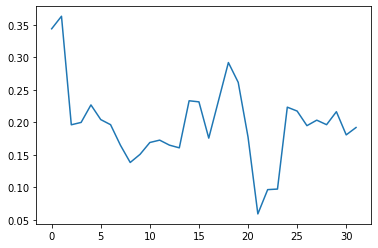

In [ ]:
# temp2のtemp列の欠損値を線形補間する
temp2['temp'] = temp2['temp'].interpolate()

# 欠損値の周辺の行を折れ線グラフに表示し、補間されたことを確認する
# temp2.loc[:30, 'temp'].plot() でも可
temp2['temp'].iloc[0:32].plot(kind = 'line')

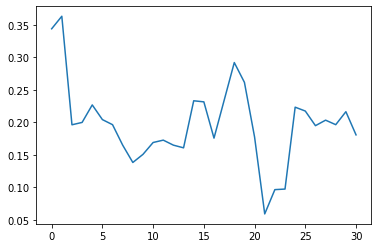

## 10.3 より高度な外れ値の処理

**問20**  
temp2のtemp列、hum列のみを抽出してtemp_humに代入してください。  
また、temp_humの欠損値を削除してください。  
その後、temp_humの先頭5行を表示してください。

In [ ]:
# temp2のtemp列、hum列のみを抽出し、temp_humに代入する
temp_hum = temp2[['temp', 'hum']]

# temp_humで欠損値に含まれた行があれば削除する（上記の順に実施していれば欠損値は存在しない）
temp_hum = temp_hum.dropna()

# temp_humの先頭5行を表示する
temp_hum.head()

,temp,hum
0,0.344167,0.805833
1,0.363478,0.696087
2,0.196364,0.437273
3,0.200000,0.590435
4,0.226957,0.436957


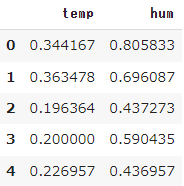

**問21**  
temp_humのマハラノビス距離を計算してください

In [ ]:
# マハラノビス距離を計算するためのインポート
from sklearn.covariance import MinCovDet

# temp_hubマハラノビス距離を計算するための準備
# MinCovDetオブジェクトの生成(乱数シードは0、support_fraction=0.7とする)
mcd = MinCovDet(random_state=0, support_fraction=0.7)

# MinCovDetオブジェクトにtemp_humの情報を抽出させる
mcd.fit(temp_hum)

# temp_humのマハラノビス距離を計算し、distance1に代入する
distance1 = mcd.mahalanobis(temp_hum)

# distance1を表示する
distance1

array([2.95106976e+00, 9.56955466e-01, 4.03311851e+00, 2.63208383e+00,
       3.58365138e+00, 2.85753832e+00, 3.17099803e+00, 3.43350635e+00,
       5.10673198e+00, 4.16574492e+00, 3.78129233e+00, 3.14680148e+00,
       4.05622650e+00, 3.50182893e+00, 2.59863196e+00, 2.79989835e+00,
       3.22034819e+00, 6.16759368e+00, 2.38271441e+00, 1.85512393e+00,
       4.02305196e+00, 7.44304966e+00, 5.93024198e+00, 5.19024047e+00,
       2.26511985e+00, 6.52224187e+00, 3.27152942e+00, 4.92317364e+00,
       2.91429079e+00, 3.31696443e+00, 2.99716055e+00, 6.08836955e+00,
       3.49372309e+00, 4.17501667e+00, 2.43788985e+00, 8.51550962e+00,
       1.39058273e+00, 2.63117106e+00, 2.44858675e+00, 4.35512949e+00,
       4.93684475e+00, 3.22041632e+00, 2.38519100e+00, 2.21277505e+00,
       3.52229133e+00, 6.22054679e+00, 2.83715823e+00, 8.56052412e-01,
       7.46207273e-01, 1.07321847e+01, 3.47223977e+00, 1.11947852e+00,
       2.96271435e+00, 3.91752278e+00, 1.73407177e+00, 1.12262368e+00,
      

array([2.95106976e+00, 9.56955466e-01, 4.03311851e+00, 2.63208383e+00,  
       3.58365138e+00, 2.85753832e+00, 3.17099803e+00, 3.43350635e+00,  
       5.10673198e+00, 4.16574492e+00, 3.78129233e+00, 3.14680148e+00,  
       4.05622650e+00, 3.50182893e+00, 2.59863196e+00, 2.79989835e+00,  
...

**問22**  
distance1の基本統計量を求めてください

In [ ]:
# distance1からシリーズを作成し、sr_distanceに代入する
sr_distance = pd.Series(distance1)

# sr_distanceの基本統計量を求め、describe1に代入する
describe1 = sr_distance.describe()

# describe1の内容を表示する
describe1

count    730.000000
mean       2.150801
std        1.794987
min        0.001727
25%        0.998107
50%        1.680212
75%        2.928896
max       21.942027
dtype: float64

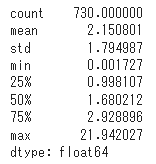

**問23**  
四分位範囲を用いて外れ値とする上限、下限を求めてください

In [ ]:
# describe1から、distance1の四分位範囲（第3四分位数 - 第1四分位数）を計算し、IQRに代入する
IQR = describe1['75%'] - describe1['25%']

# 値が大きい側の外れ値の閾値(上限値)を　第3四分位数 + 1.5 * IQR とする。
# 計算結果をjougenに代入し、表示する
jougen = describe1['75%'] + 1.5 * IQR
print('===上限===')
print(jougen)

# 値が小さい側の外れ値の閾値(下限値)を　第1四分位数 - 1.5 * IQR とする。
# 計算結果をkagenに代入する
kagen = describe1['25%'] - 1.5 * IQR
print('===下限===')
print(kagen)

===上限===
5.8250780679426395
===下限===
-1.8980753067798464


===上限===  
5.8250780679426395  
===下限===  
-1.8980753067798464

**問24**  
上記で求めた上限、下限より、sr_distanceでの外れ値を求めて表示してください

In [ ]:
# sr_distance内から「上限よりも大きい」または「下限よりも小さい」を条件にデータを抽出し、outlierへ代入する
outlier = sr_distance[ (sr_distance > jougen) | (sr_distance < kagen) ]

# 抽出された「外れ値」を表示する
print('外れ値')
print(outlier)

外れ値
17      6.167594
21      7.443050
22      5.930242
25      6.522242
31      6.088370
35      8.515510
45      6.220547
49     10.732185
61      6.901785
64      6.940807
68     21.942027
86      6.642966
87      5.909475
89      7.434339
152     8.361745
206     6.101363
264     6.730135
300     6.447257
324     7.067592
338     6.195861
339     7.452031
367     6.079920
384     6.552184
385     5.885010
386     8.153891
392     6.169851
450     6.606182
461     7.752373
462     7.068012
542     6.049122
551     5.945786
dtype: float64


外れ値  
17      6.167594  
21      7.443050  
22      5.930242  
25      6.522242  
...

**問25**  
上記で外れ値としたデータを削除してください

In [ ]:
# temp_humから、上記の外れ値の行を削除し、temp_hum_droppedに代入する
# ヒントデータフレームのdropメソッドに、抽出した外れ値のindexを指定する
temp_hum_dropped = temp_hum.drop(index = outlier.index)

#削除後のtemp_hum_droppedの行数、列数を表示する
temp_hum_dropped.shape

(699, 2)

(699, 2)